# Neutron Star Interior: CPU-Based TOV Solver Example

This Jupyter Notebook project demonstrates an example implementation for solving the interior structure of a neutron star using the Tolman-Oppenheimer-Volkoff (TOV) equation on a CPU. The primary goal is to illustrate the numerical techniques needed for such astrophysical problems and to serve as a foundation for developing a GPU-accelerated version.

---

## Overview

Neutron stars are extremely dense remnants of supernova explosions. Their equilibrium structure is governed by the balance between gravitational forces and internal pressure. The TOV equation, which extends the classical hydrostatic equilibrium to the realm of general relativity, is central to modeling these objects.

**Project Objectives:**

- Understand the derivation and significance of the TOV equation.
- Implement a CPU-based numerical solver for the TOV equations.
- Transition the solver from a CPU to a GPU implementation to exploit parallel computing and enhance performance.

---

## The TOV Equation

The TOV equation describes the balance of forces within a spherically symmetric, static star in general relativity. It is given by:

$$
\frac{dP(r)}{dr} = -\frac{G \left[\rho(r) + \frac{P(r)}{c^2}\right] \left[m(r) + 4\pi r^3 \frac{P(r)}{c^2}\right]}{r^2 \left[1 - \frac{2G m(r)}{r c^2}\right]}
$$

where:

- \( P(r) \) is the pressure at radius \( r \),
- \( \rho(r) \) is the energy density at radius \( r \),
- \( m(r) \) is the mass enclosed within radius \( r \),
- \( G \) is the gravitational constant,
- \( c \) is the speed of light.

In addition to the TOV equation, the mass continuity equation is used:

$$
\frac{dm(r)}{dr} = 4\pi r^2 \rho(r)
$$

These coupled differential equations are solved from the center of the star outward until the pressure drops to zero, which defines the surface of the star.

---

## CPU-Based Implementation

### Key Features

- **Numerical Integration:** Uses methods such as the Runge-Kutta algorithm to integrate the TOV and mass continuity equations.
- **Visualization:** Generates plots for pressure, density, and enclosed mass as functions of the radial distance from the center of the neutron star.
- **Modular Code Structure:** The code is organized into functions to compute the derivatives and perform the integration, making it easier to maintain and extend.

### Code Walkthrough

1. **Initialization:** Define initial conditions (e.g., central density, pressure) and physical constants.
2. **Differential Equations:** Implement functions to calculate \( \frac{dP}{dr} \) and \( \frac{dm}{dr} \) based on the TOV and mass continuity equations.
3. **Integration Loop:** Step through the star’s radius, updating the pressure and mass until the surface is reached.
4. **Plotting:** Visualize the resulting profiles of the neutron star's interior structure.

---

## Transition to a GPU-Based TOV Solver

### Why GPU?

- **Performance:** GPUs can perform many calculations in parallel, significantly speeding up the integration process, especially when exploring a large parameter space.
- **Scalability:** Ideal for high-resolution models or running multiple simulations simultaneously.

### Tasks for GPU Implementation

1. **Analyze the CPU Code:** Identify the computational bottlenecks and loops that are suitable for parallel execution.
2. **Select a GPU Framework:** Consider libraries like Numba (with CUDA), PyCUDA, or CuPy to implement GPU kernels in Python.
3. **Develop GPU Kernels:** Rewrite the integration routines to run on the GPU, ensuring that data transfer between CPU and GPU is optimized.
4. **Validation:** Compare the GPU results with the CPU results to verify accuracy.
5. **Benchmarking:** Measure performance improvements and optimize further if needed.

### Implementation Hints

- **Memory Management:** Efficiently manage data transfer between the host (CPU) and device (GPU).
- **Parallelization Strategy:** Exploit parallelism in the integration loop or by running multiple simulations concurrently.
- **Debugging:** Use smaller test cases to validate GPU kernels before scaling up to full simulations.

---

## Conclusion

This project serves as a comprehensive introduction to solving the TOV equations for neutron star interiors using numerical methods. While the provided CPU-based code lays the groundwork, the next step is to develop a GPU-based version to improve computational efficiency. This will not only deepen your understanding of numerical astrophysics but also provide hands-on experience with high-performance computing techniques.

Feel free to explore, modify, and extend the code. Good luck with your development of the GPU-based TOV solver!


## CPU version

In [3]:
import tov
import pandas as pd
import numpy as np
import scipy.interpolate as scipy
import matplotlib.pyplot as plt

In [4]:
eos = pd.read_csv("253_RMF_EOS.txt", delimiter=" ")

e_array = np.array(eos["e"])
p_array = np.array(eos["p"])

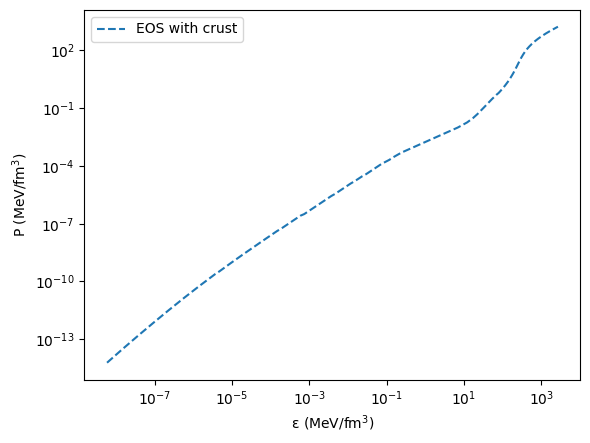

In [5]:
tov_instance = tov.TOV(e_array, p_array, add_crust=False, plot_eos=True)

In [14]:
m_dens = 1.5
M_dens = 3
N_dens = 100

m_arr  = []
R_arr  = []
L_arr  = []
k2_arr = []
C_arr  = []
d_arr  = []
rd_arr = []

energy_to_baryonic = scipy.interp1d(eos['e'], eos['rho'])


for dens_c in np.logspace(M_dens, m_dens, N_dens):
    NS_prop = tov_instance.solve_tidal(dens_c)
    R, M, C, k2, y, beta, H = NS_prop[0], NS_prop[1], NS_prop[2], NS_prop[3], NS_prop[4], NS_prop[5], NS_prop[6]
    m_arr.append(M)
    R_arr.append(R)
    L_arr.append(2/3*k2/C**5)
    k2_arr.append(k2)
    C_arr.append(C)
    R_arr.append(R)
    m_arr.append(M)
    d_arr.append(dens_c)
    rd_arr.append(energy_to_baryonic(dens_c))

ValueError: A value (1000.0) in x_new is below the interpolation range's minimum value (10440.401407162211).

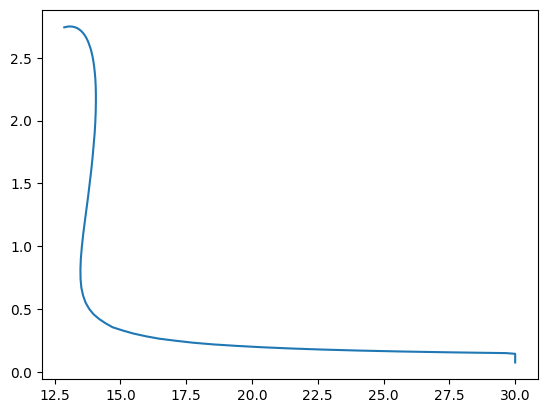

In [13]:
plt.plot(R_arr, m_arr)